## Problem Statement

In Bangladesh, accurately predicting house prices remains a significant challenge due to limited data availability and complex market dynamics. This project aims to develop a robust and reliable machine learning model that can accurately predict house prices using data from beproperty.com, a popular real estate platform in the country. By achieving this, we can potentially:

- Empower potential buyers and sellers with better information for informed decision-making.
- Provide valuable insights to real estate professionals for improved strategy and valuation.
- Contribute to a more efficient and transparent housing market in Bangladesh.

The project will focus on:

- Identifying key factors influencing house prices in Bangladesh from the beproperty.com dataset.
- Building and comparing different machine learning models for accurate price prediction.
- Evaluating the performance of the models based on relevant metrics.
Analyzing and interpreting the model results to provide insights into the - Bangladeshi housing market.

By successfully addressing this problem, we can not only address an immediate need for accurate house price prediction but also contribute to a more informed and dynamic housing market in Bangladesh.

## Importing Libraries and Packages

In [71]:

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization
import plotly.express as px


from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.pipeline import Pipeline  # For creating machine learning pipelines

# Core machine learning algorithms for regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder



In [114]:
# Loading data
def load_data(file_path, file_type="csv"):
   """Loads data from the specified file path and returns a pandas DataFrame.

   """

   if file_type == "csv":
       df = pd.read_csv(file_path)
   elif file_type == "excel":
       df = pd.read_excel(file_path)
   else:
       raise ValueError("Unsupported file type.")

   return df


In [115]:
# Calling the load_data function 
data_path = "../data/raw/Bangladesh_property_prices.csv"  # Replace with the actual path to your data file
df = load_data(data_path)

# Check the DataFrame:
print(df.shape)
print(type(df))


(4704, 12)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
linear_model
decision_tree_model
random_forest_model
knn_model
svm_model
gradient_boosting_model
xgb_model
lgbm_model

In [116]:
df.sample(10)

Unnamed: 0.1  Unnamed: 0                                  Location  \
508            508       511.0             School Road, Mohakhali, Dhaka   
4292          4292      4332.0           Block C, Bashundhara R-A, Dhaka   
1484          1484      1494.0  Chandrima Model Town, Mohammadpur, Dhaka   
1864          1864      1878.0                 Section 10, Mirpur, Dhaka   
1220          1220      1227.0               Matikata, Cantonment, Dhaka   
4507          4507      4551.0                 Section 12, Mirpur, Dhaka   
521            521       524.0                  Section 1, Mirpur, Dhaka   
2206          2206      2224.0                  Section 1, Mirpur, Dhaka   
6                6         6.0                 Section 11, Mirpur, Dhaka   
183            183       184.0       North Jatra Bari, Jatra Bari, Dhaka   

         Price       Type  No. Beds  No. Baths    Area  Latitude  Longitude  \
508    9500000  Apartment       3.0        3.0  1400.0  23.83209   90.42215   
4292  15000000  Apartment       3.0        3.0  1826.0  23.75596   90.37065   
1484   7000000  Apartment       3.0        3.0  1600.0  23.76427   90.36547   
1864   5500000  Apartment       3.0        2.0  1100.0  23.81223   90.35967   
1220   3320000  Apartment       2.0        2.0   830.0  23.81934   90.39418   
4507  25000000       Plot       NaN        NaN  1456.0  23.81223   90.35967   
521    4500000  Apartment       2.0        2.0   850.0  23.81223   90.35967   
2206   7320000  Apartment       3.0        3.0  1240.0  23.81223   90.35967   
6      6800000  Apartment       3.0        3.0  1260.0  23.81223   90.35967   
183    3200000  Apartment       2.0        2.0   600.0  23.71667   90.42181   

              Region            Sub-region  
508        Mohakhali           School Road  
4292  BashundharaR-A               Block C  
1484     Mohammadpur  Chandrima Model Town  
1864          Mirpur            Section 10  
1220      Cantonment              Matikata  
4507          Mirpur            Section 12  
521           Mirpur             Section 1  
2206          Mirpur             Section 1  
6             Mirpur            Section 11  
183        JatraBari      North Jatra Bari

In [64]:
def wrangle(df):
    """Performs essential data wrangling steps for the house price prediction project.

    Args:
        df (pandas.DataFrame): The input DataFrame containing house price data.

    Returns:
        : The wrangled DataFrame.
    """
    # Droping features
    df.drop(columns=["Unnamed: 0.1", "Unnamed: 0", "Location"], inplace=True)
    
    # Instantiate LabelEncoder
    label_encoder = LabelEncoder()

    # Categorical to Numerical transformation
    df['Type_n'] = label_encoder.fit_transform(df['Type'])
    df['Region_n'] = label_encoder.fit_transform(df['Region'])
    df['Sub-region_n'] = label_encoder.fit_transform(df['Sub-region'])


    return df


In [65]:
#df = load_data(file_path="../data/raw/Bangladesh_property_prices.csv")  # Replace with the actual path
wrangled_df = wrangle(df)
wrangled_df.head()

Price       Type  No. Beds  No. Baths    Area  Latitude  Longitude  \
0   7500000  Apartment       3.0        3.0  1300.0  23.86846   90.39280   
1   7280000  Apartment       4.0        4.0  1456.0  23.81223   90.35967   
2  13000000  Apartment       3.0        3.0  1550.0  23.75349   90.42469   
3  37000000  Apartment       3.0        3.0  2669.0  23.78855   90.40081   
4   3600000  Apartment       2.0        2.0   835.0  23.76354   90.43180   

     Region              Sub-region  Type_n  Region_n  Sub-region_n  
0    Uttara               Sector 10       0        67           350  
1    Mirpur              Section 11       0        40           342  
2  Khilgaon           Chowdhuripara       0        31            75  
3    Banani               Road No 4       0         4           320  
4  Banasree  South Banasree Project       0         6           406

In [41]:
df.head()

Price       Type  No. Beds  No. Baths    Area  Latitude  Longitude  \
0   7500000  Apartment       3.0        3.0  1300.0  23.86846   90.39280   
1   7280000  Apartment       4.0        4.0  1456.0  23.81223   90.35967   
2  13000000  Apartment       3.0        3.0  1550.0  23.75349   90.42469   
3  37000000  Apartment       3.0        3.0  2669.0  23.78855   90.40081   
4   3600000  Apartment       2.0        2.0   835.0  23.76354   90.43180   

     Region              Sub-region  
0    Uttara               Sector 10  
1    Mirpur              Section 11  
2  Khilgaon           Chowdhuripara  
3    Banani               Road No 4  
4  Banasree  South Banasree Project

In [73]:
import plotly.express as px

# Assuming 'df' is your DataFrame containing Dhaka city data
fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    center={"lat": 23.8103, "lon": 90.4125},  # Map will be centered on Dhaka
    width=1200,
    height=600,
    hover_data=["Price"],
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()


## EDA

In [77]:
# Display basic statistics
print("Basic Statistics:\n", df.describe())

Basic Statistics:
               Price     No. Beds    No. Baths          Area     Latitude  \
count  4.704000e+03  4500.000000  4500.000000   4704.000000  4704.000000   
mean   1.001724e+07     2.981333     2.830889   1460.678146    23.780563   
std    9.787789e+06     1.456064     0.862690   1067.267396     0.047919   
min    5.000000e+05     1.000000     1.000000    320.000000    23.644560   
25%    5.000000e+06     3.000000     2.000000   1050.000000    23.752610   
50%    7.000000e+06     3.000000     3.000000   1275.000000    23.770260   
75%    1.080000e+07     3.000000     3.000000   1550.000000    23.812230   
max    8.131280e+07    46.000000    10.000000  43344.000000    23.893380   

         Longitude       Type_n     Region_n  Sub-region_n  
count  4704.000000  4704.000000  4704.000000   4704.000000  
mean     90.391496     0.138818    30.652423    222.170281  
std       0.035239     0.619059    20.400866    142.544974  
min      90.246430     0.000000     0.000000      0.

In [79]:
df.columns

Index(['Price', 'Type', 'No. Beds', 'No. Baths', 'Area', 'Latitude',
       'Longitude', 'Region', 'Sub-region', 'Type_n', 'Region_n',
       'Sub-region_n'],
      dtype='object')

### Feature engineering

In [ ]:
# Price per Square Foot
df['Price_per_sqft'] = df['Price'] / df['Area']


In [ ]:
# Interaction Features
df['Beds_Baths_Ratio'] = df['No. Beds'] / df['No. Baths']


In [ ]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# numerical_features = ['No. Beds', 'No. Baths', 'Area', 'Latitude', 'Longitude', 'Property_Age']
# df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [ ]:
# Binning - Convert Continuous Variable to Categorical
bins = [0, 1000, 2000, 3000, float('inf')]
labels = ['Small', 'Medium', 'Large', 'Very Large']
df['Area_Category'] = pd.cut(df['Area'], bins=bins, labels=labels, right=False)


In [ ]:
# Log Transformation for Skewed Variables
df['Log_Price'] = np.log1p(df['Price'])


In [ ]:
# Fill missing values with mean or median
df['No. Beds'].fillna(df['No. Beds'].median(), inplace=True)
df['No. Baths'].fillna(df['No. Baths'].median(), inplace=True)


### Visualization

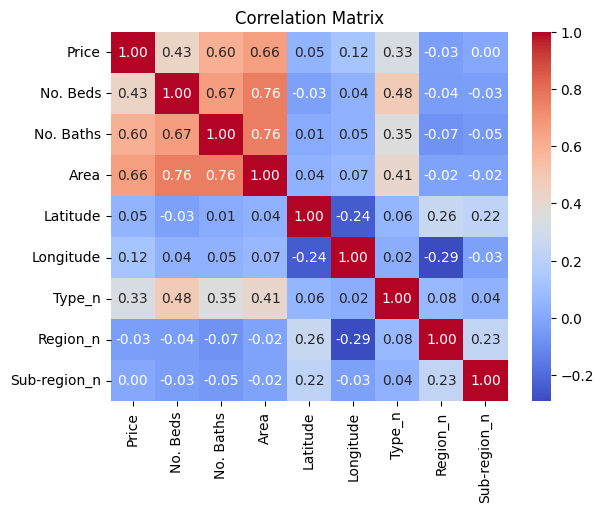

In [83]:
# Correlation matrix
correlation_matrix = df[['Price', 'No. Beds', 'No. Baths', 'Area', 'Latitude',
       'Longitude', 'Type_n', 'Region_n',
       'Sub-region_n']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



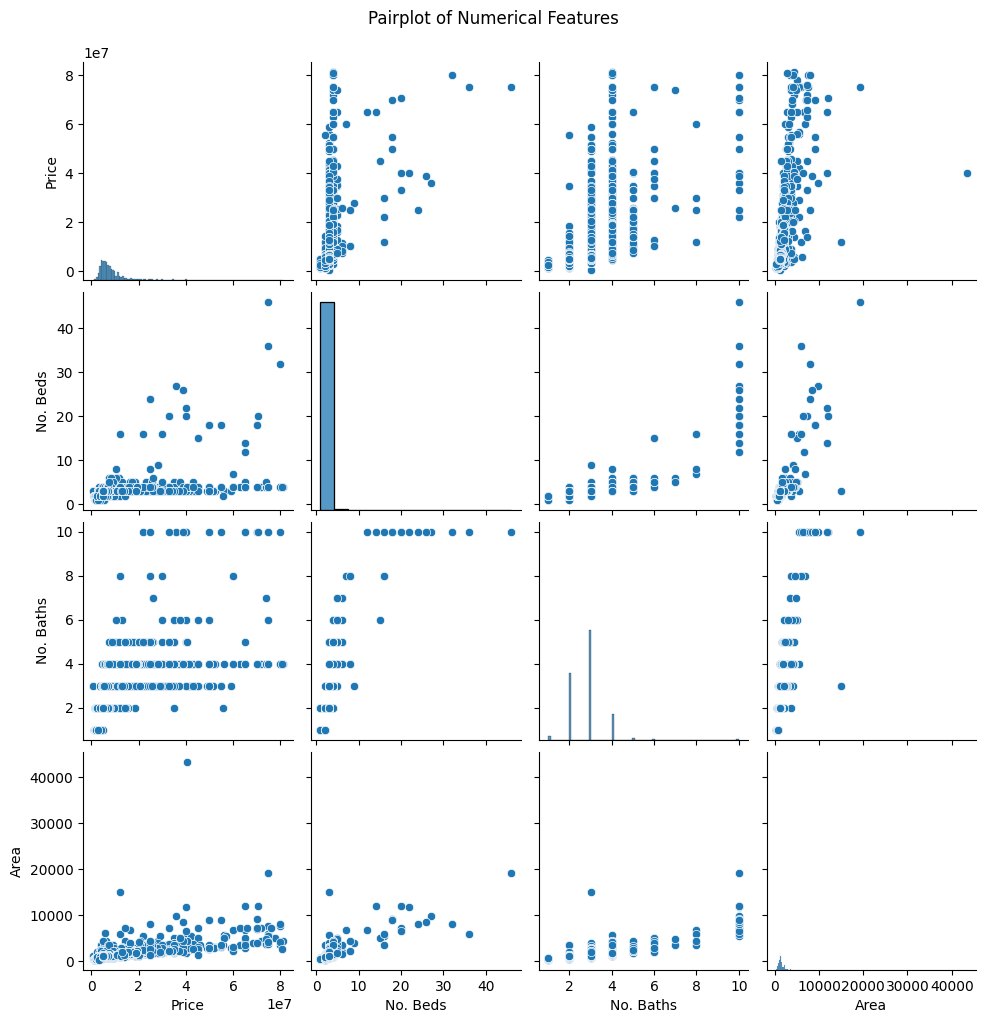

In [84]:
# Pairplot for numerical features
sns.pairplot(df[['Price', 'No. Beds', 'No. Baths', 'Area']])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

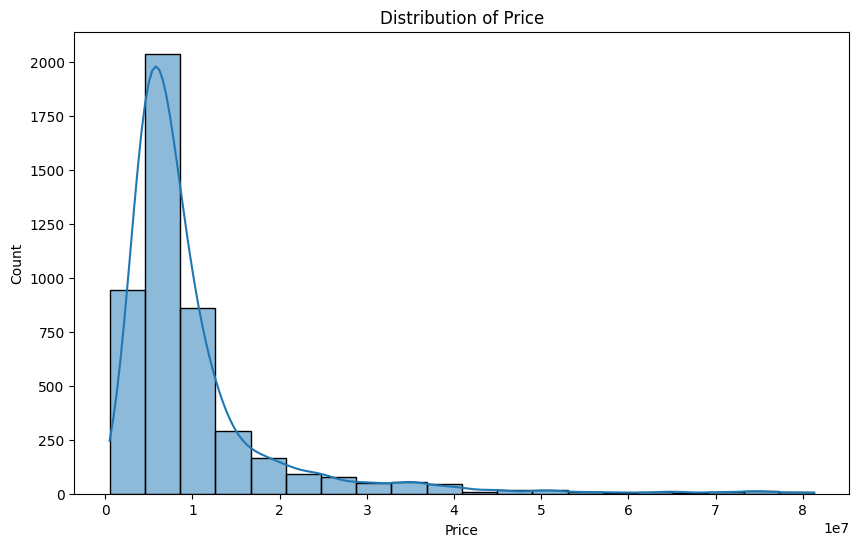

In [85]:
# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=20)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.show()

In [88]:
# Scatter plot using Plotly Express
fig = px.scatter(df, x='Area', y='Price')
fig.update_layout(title="Scatter Plot of Price vs Area")
fig.show()

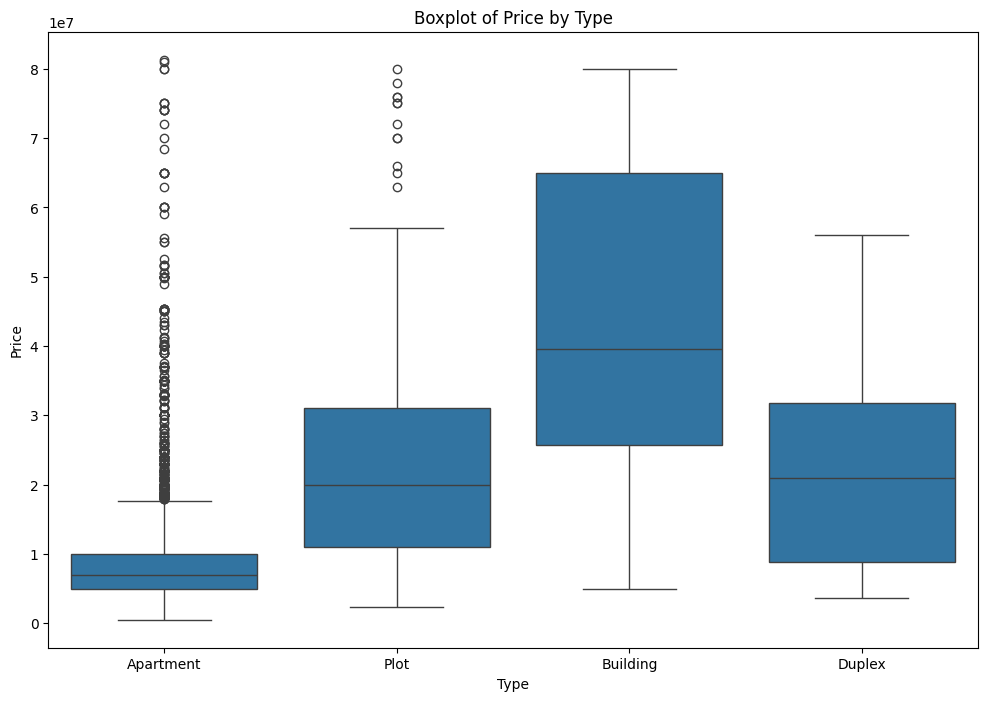

In [89]:
# Boxplot for Price by Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Type', y='Price', data=df)
plt.title("Boxplot of Price by Type")
plt.show()

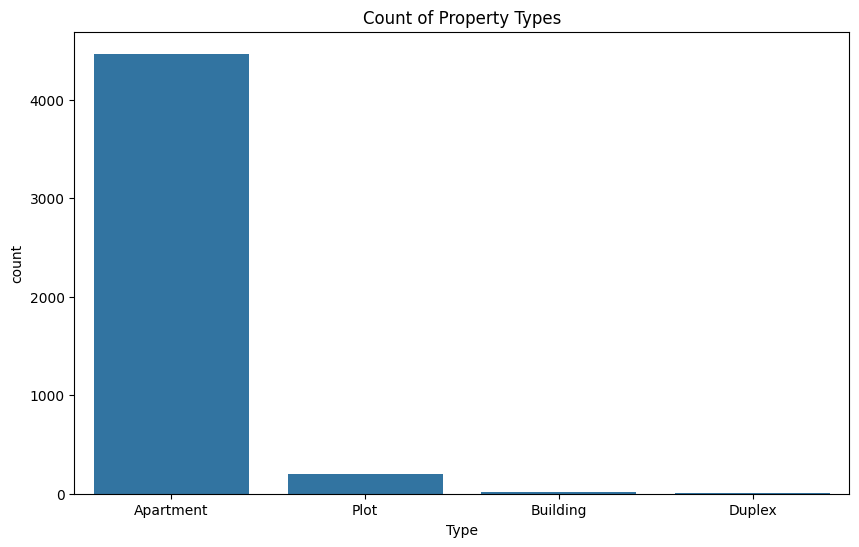

In [90]:
# Countplot for Types
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=df)
plt.title("Count of Property Types")
plt.xlabel("Type")
plt.show()

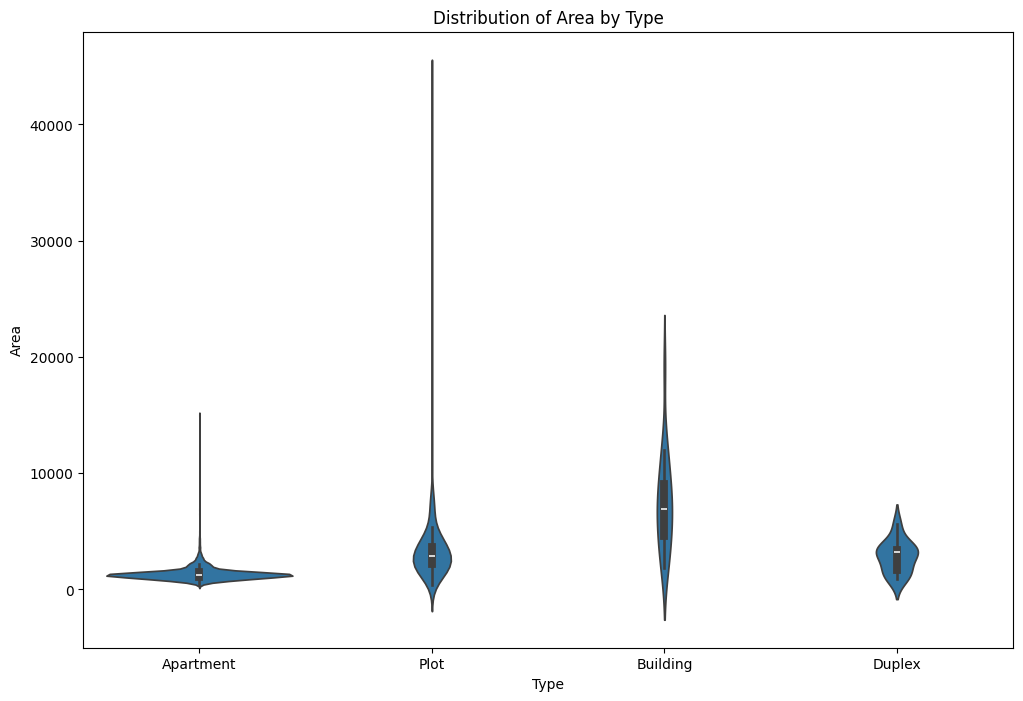

In [91]:
# Distribution of Area by Type
plt.figure(figsize=(12, 8))
sns.violinplot(x='Type', y='Area', data=df)
plt.title("Distribution of Area by Type")
plt.xlabel("Type")
plt.ylabel("Area")
plt.show()

In [92]:
# Geographic Distribution using Plotly Express
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color="Price",
                        size="Area", hover_data=["Type", "Region", "Sub-region"],
                        mapbox_style="carto-positron")
fig.update_layout(title="Geographic Distribution of Properties")
fig.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:


The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:


The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:


The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:


The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:


The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:


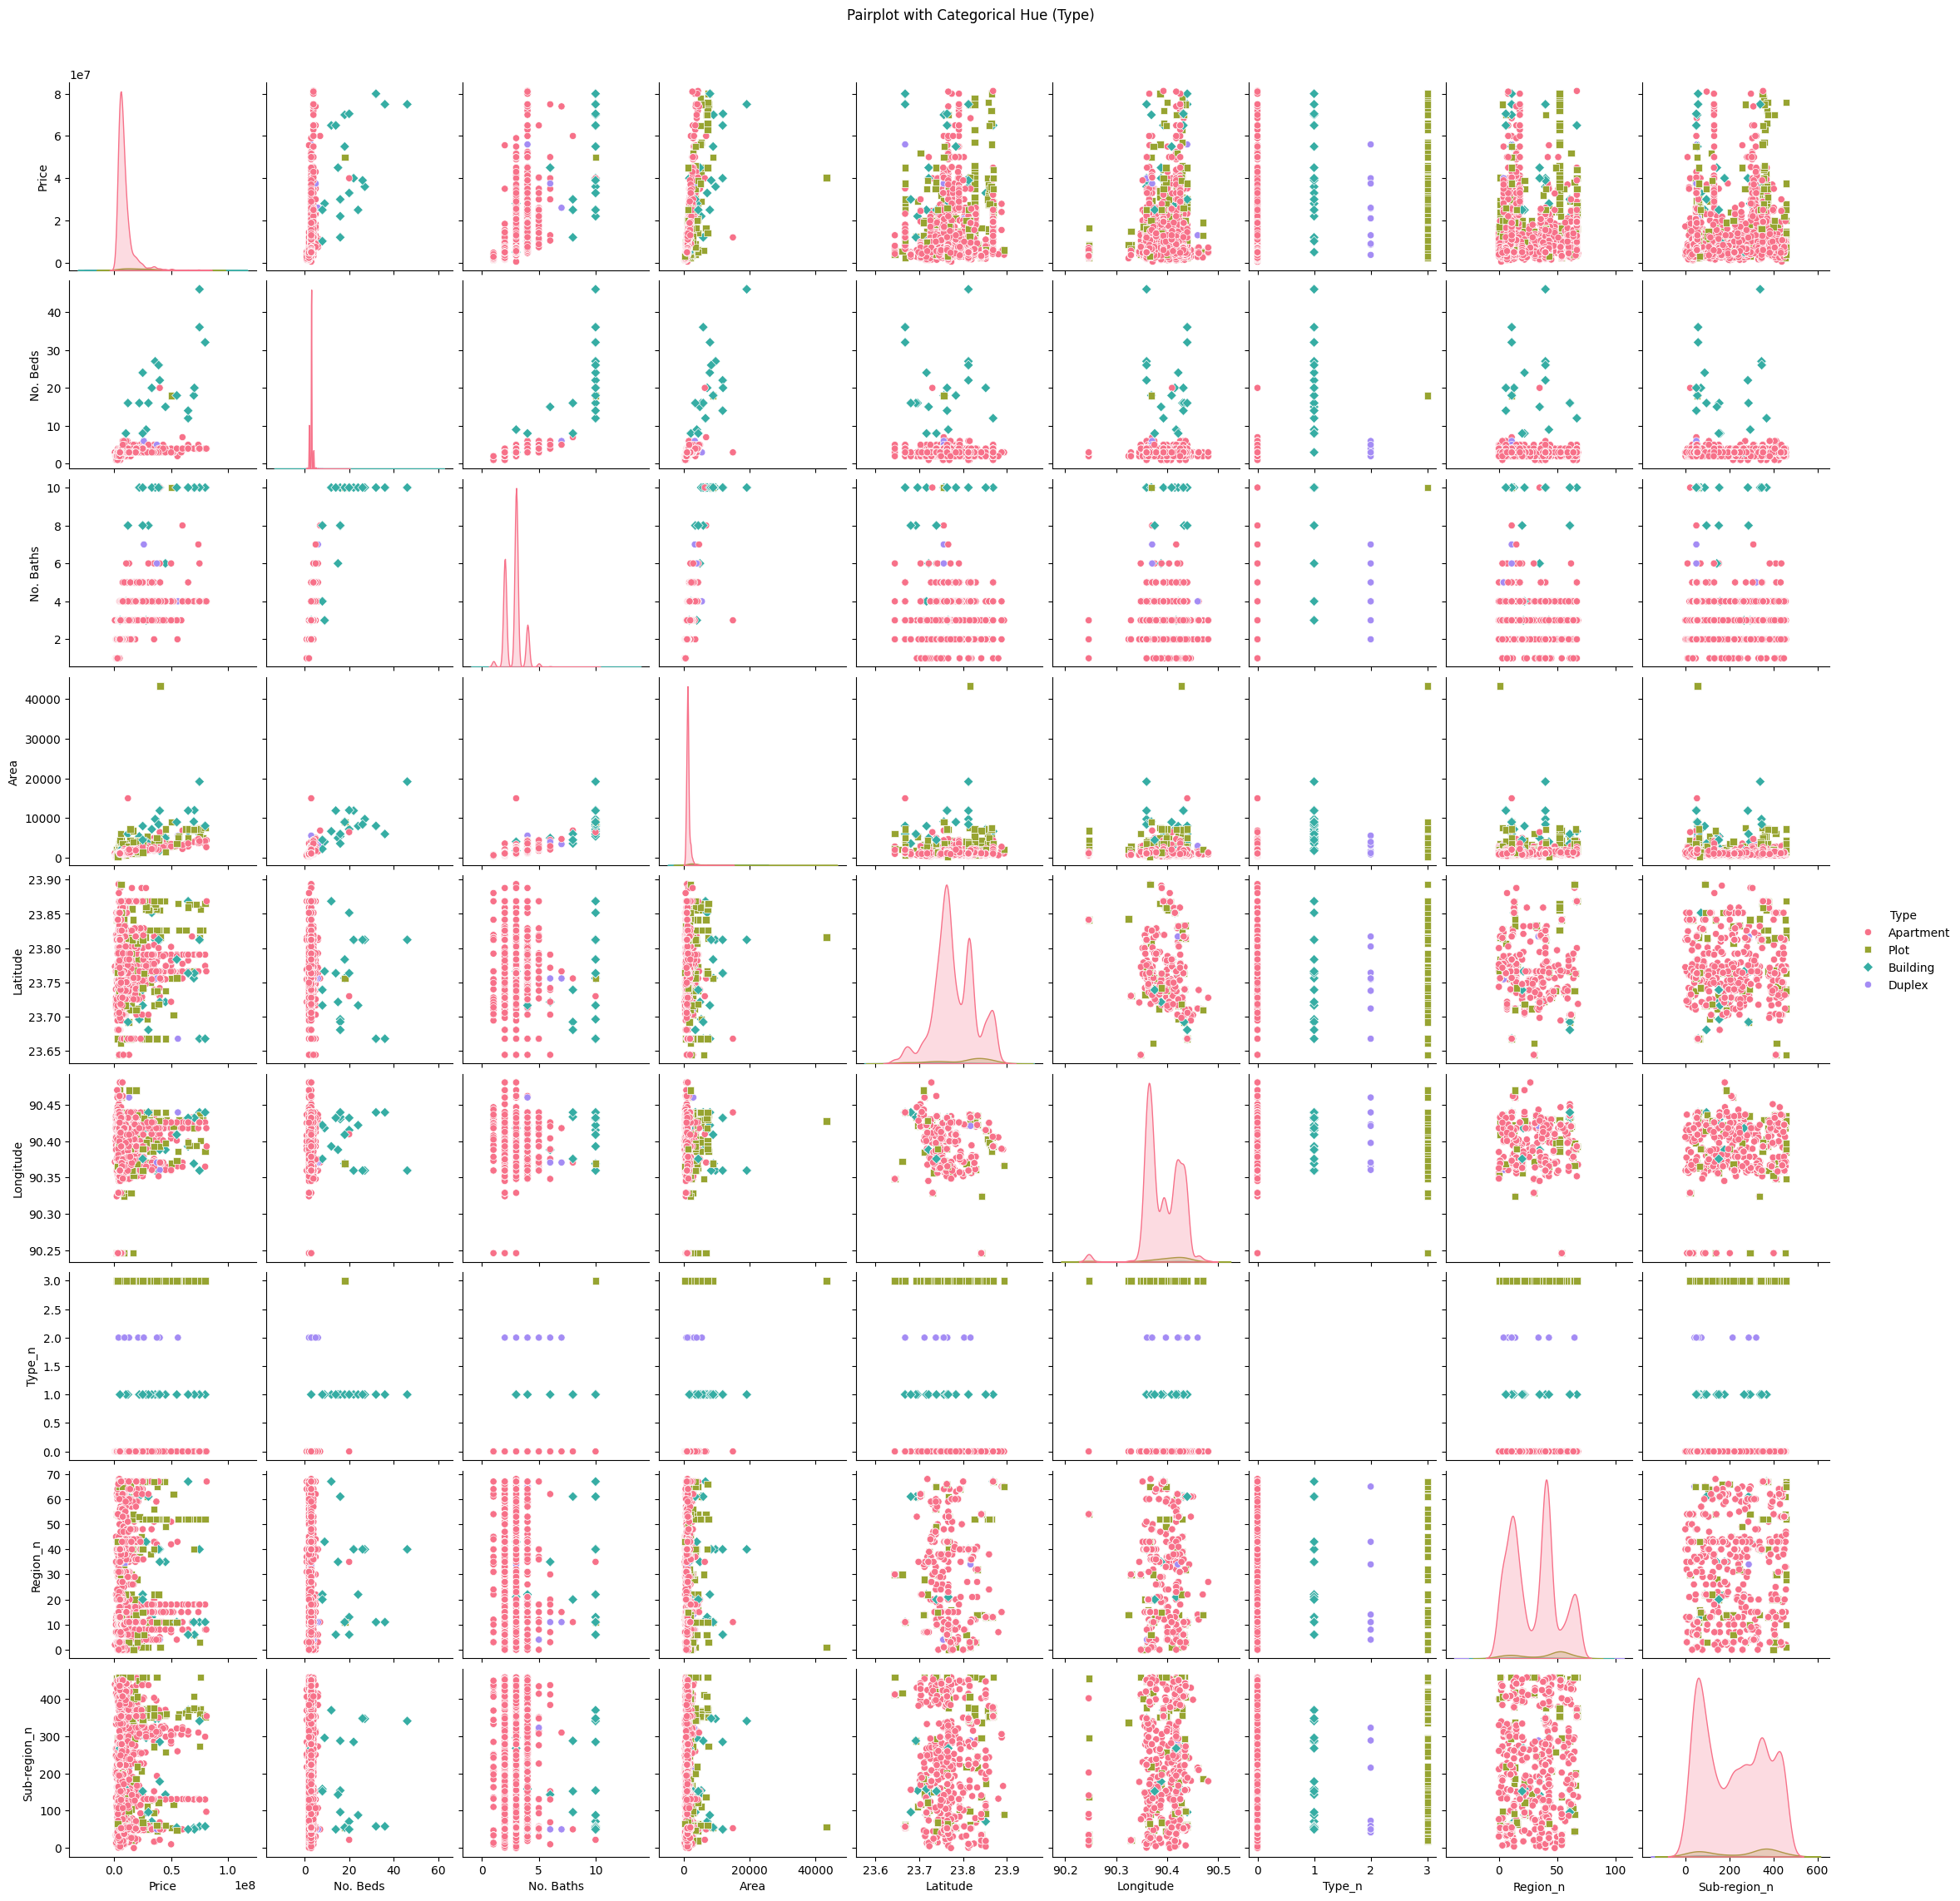

In [93]:
# Pairplot with categorical hue
sns.pairplot(df, hue='Type', palette='husl', markers=['o', 's', 'D'])
plt.suptitle("Pairplot with Categorical Hue (Type)", y=1.02)
plt.show()

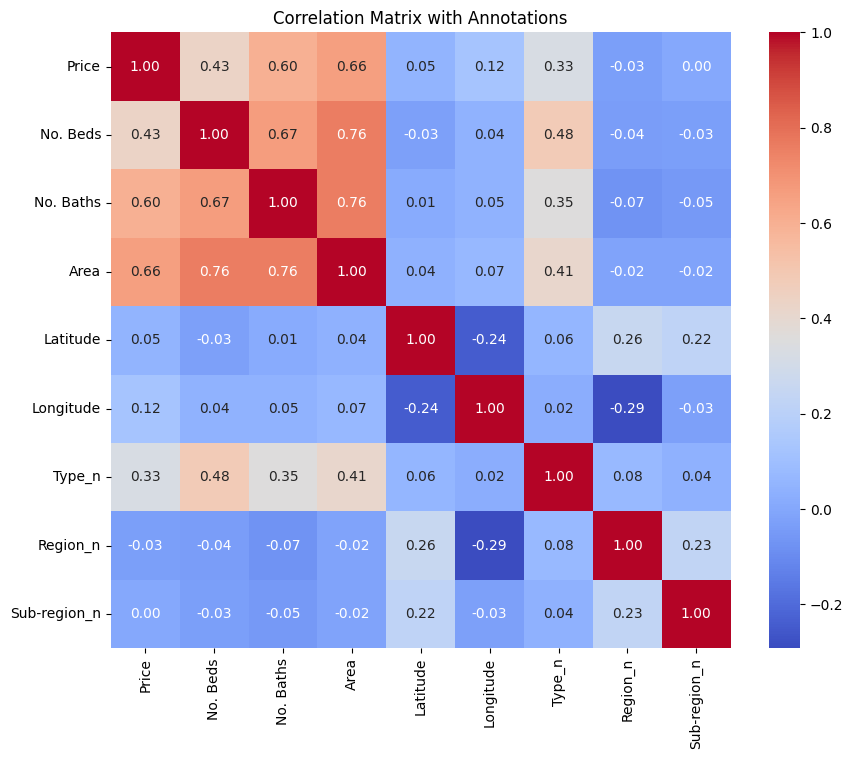

In [94]:
# Correlation heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix with Annotations")
plt.show()

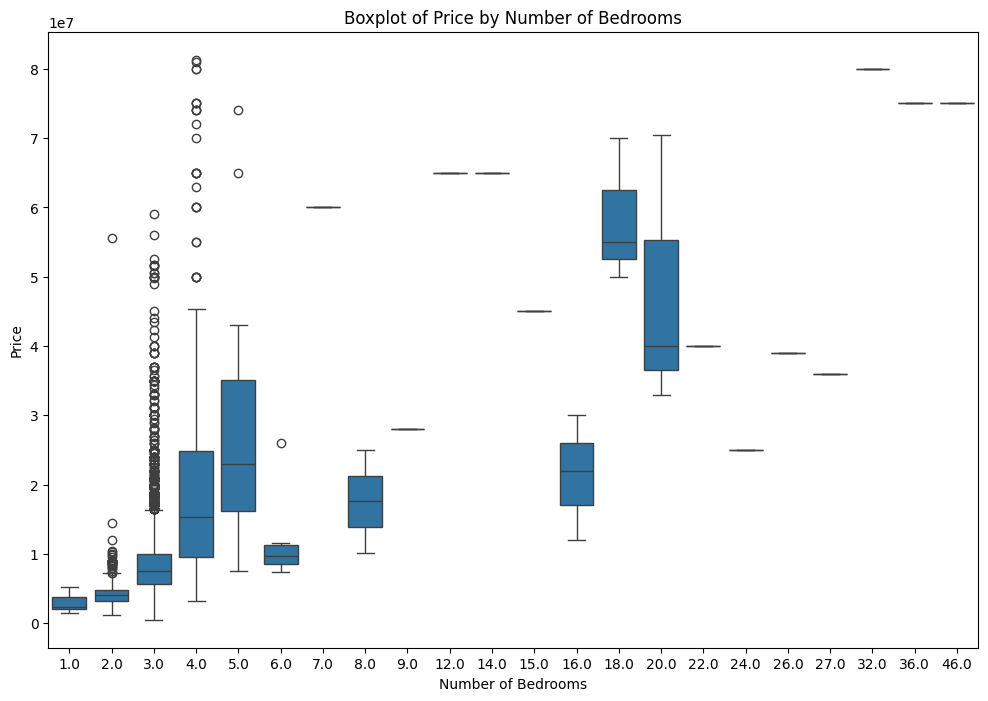

In [95]:
# Boxplot for Bedrooms and Bathrooms
plt.figure(figsize=(12, 8))
sns.boxplot(x='No. Beds', y='Price', data=df)
plt.title("Boxplot of Price by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.show()

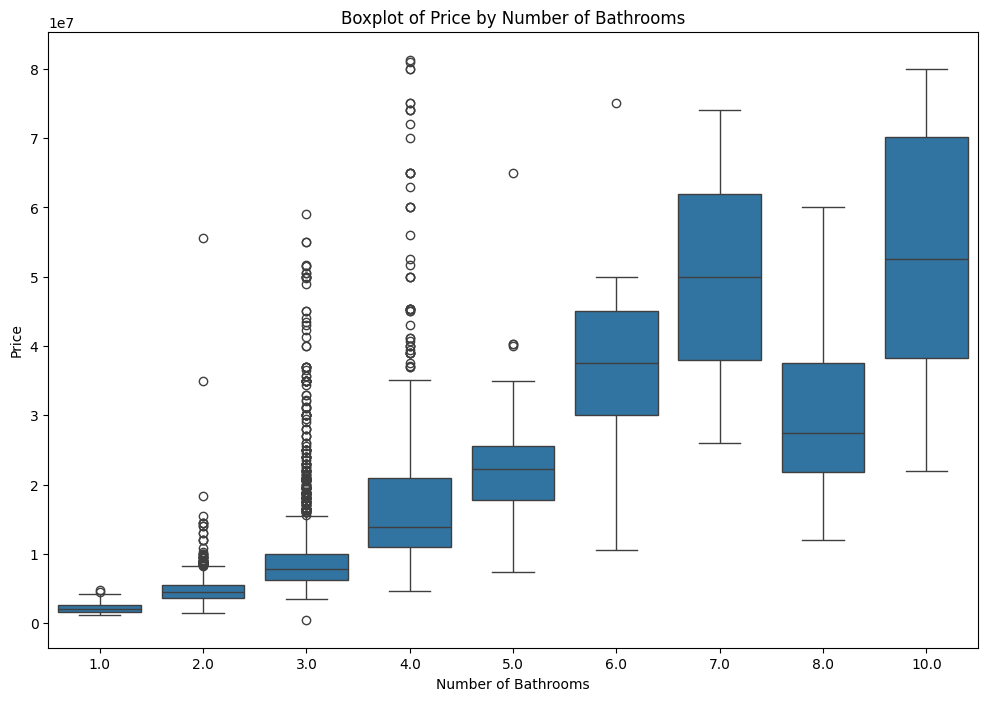

In [96]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='No. Baths', y='Price', data=df)
plt.title("Boxplot of Price by Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_9792\1857852260.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




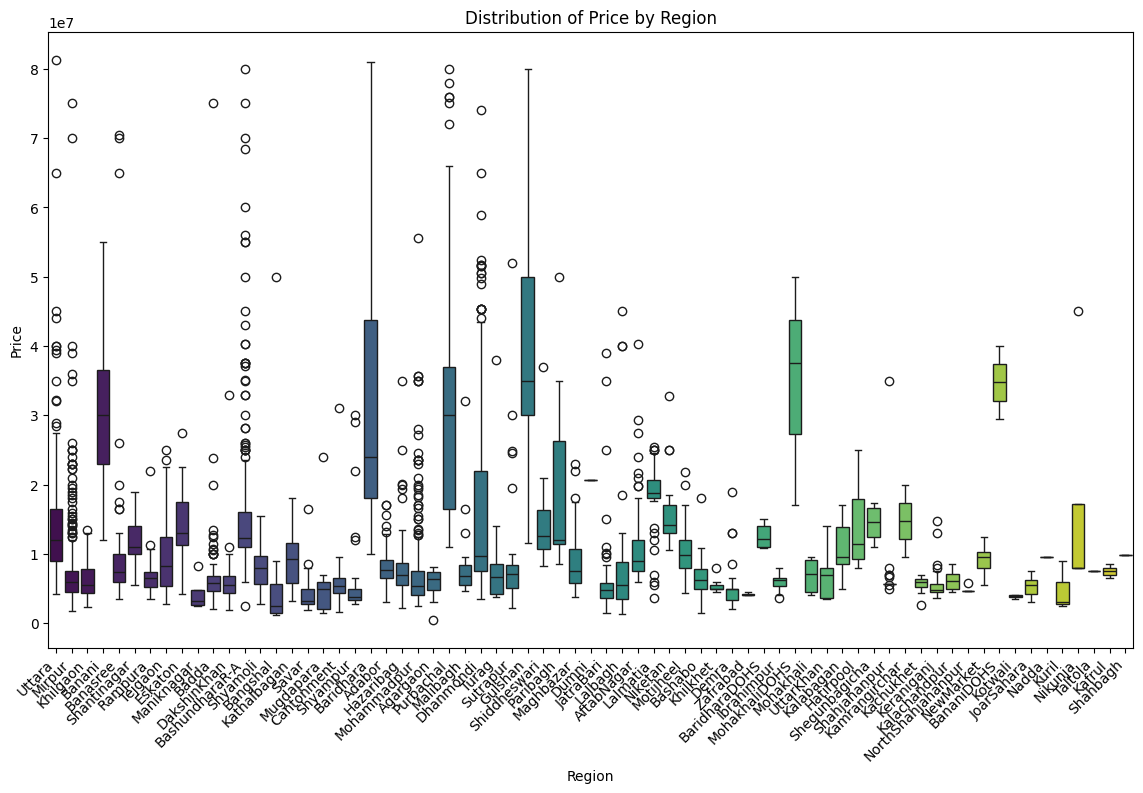

In [97]:
# Distribution of Price by Region
plt.figure(figsize=(14, 8))
sns.boxplot(x='Region', y='Price', data=df, palette='viridis')
plt.title("Distribution of Price by Region")
plt.xlabel("Region")
plt.xticks(rotation=45, ha='right')
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:


The markers list has fewer values (3) than needed (69) and will cycle, which may produce an uninterpretable plot.

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:


The markers list has fewer values (3) than needed (69) and will cycle, which may produce an uninterpretable plot.

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:


The markers list has fewer values (3) than needed (69) and will cycle, which may produce an uninterpretable plot.

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:


The markers list has fewer values (3) than needed (69) and will cycle, which may produce an uninterpretable plot.

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:


The markers list has fewer values (3) than needed (69) and will cycle, which may produce an uninterpretable plot.

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarn

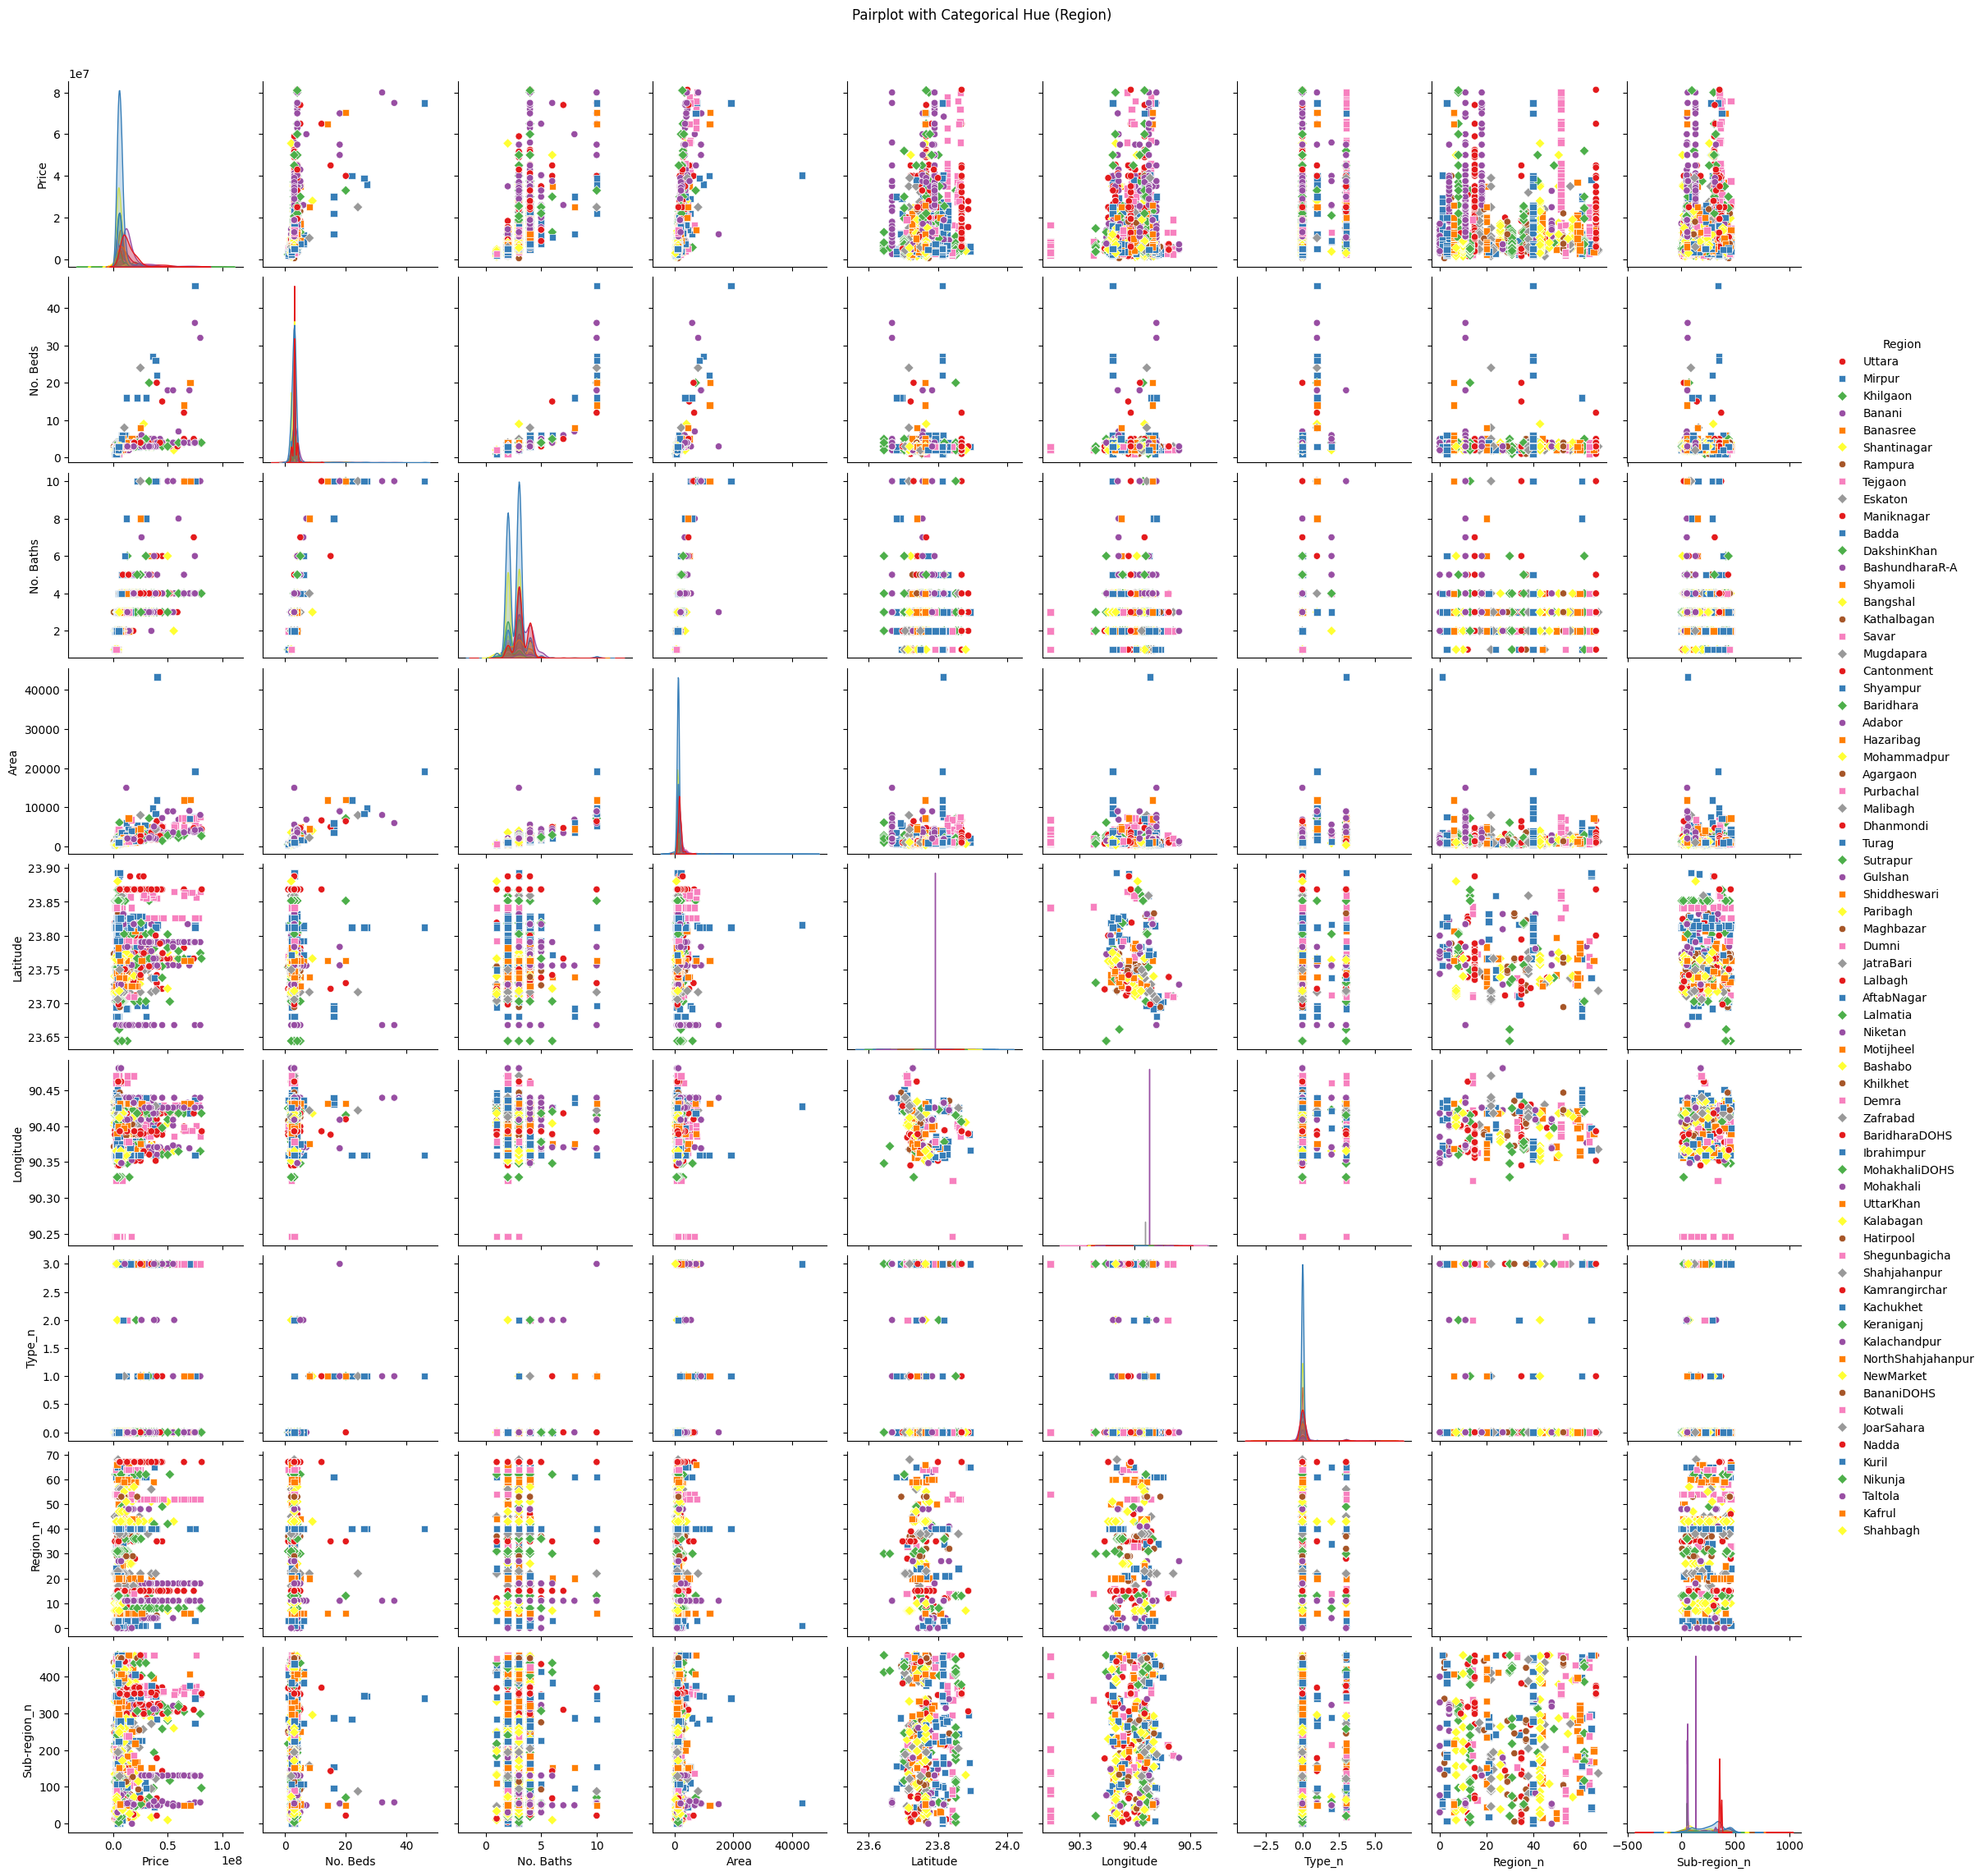

In [99]:
# Pairplot with hue for Region
sns.pairplot(df, hue='Region', palette='Set1', markers=['o', 's', 'D'])
plt.suptitle("Pairplot with Categorical Hue (Region)", y=1.02)
plt.show()

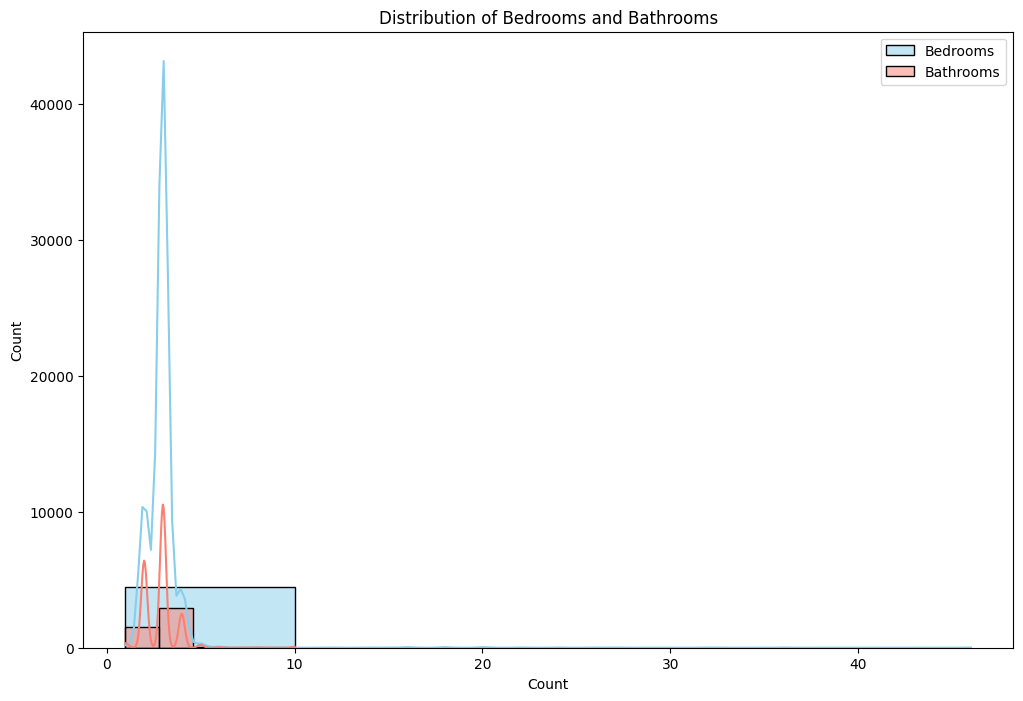

In [100]:
# Distribution of Bedrooms and Bathrooms
plt.figure(figsize=(12, 8))
sns.histplot(df['No. Beds'], kde=True, bins=5, color='skyblue', label='Bedrooms')
sns.histplot(df['No. Baths'], kde=True, bins=5, color='salmon', label='Bathrooms')
plt.title("Distribution of Bedrooms and Bathrooms")
plt.xlabel("Count")
plt.legend()
plt.show()